https://github.com/opencv/opencv/wiki/Deep-Learning-in-OpenCV
위 링크에서 미리 학습된 딥러닝 모델을 가져옵니다.

In [1]:
import sys
import numpy as np
import cv2
!pip install opencv-python

In [2]:
oldx, oldy = -1, -1

In [3]:
def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


In [4]:
def norm_digit(img): #중앙으로 쉬프트 시켜서 사용해서 정규화가 된다.
    m = cv2.moments(img)
    cx = m['m10'] / m['m00']
    cy = m['m01'] / m['m00']
    h, w = img.shape[:2]
    aff = np.array([[1, 0, w/2 - cx], [0, 1, h/2 - cy]], dtype=np.float32)
    dst = cv2.warpAffine(img, aff, (0, 0))
    return dst

# 네트워크 객체를 생성합니다

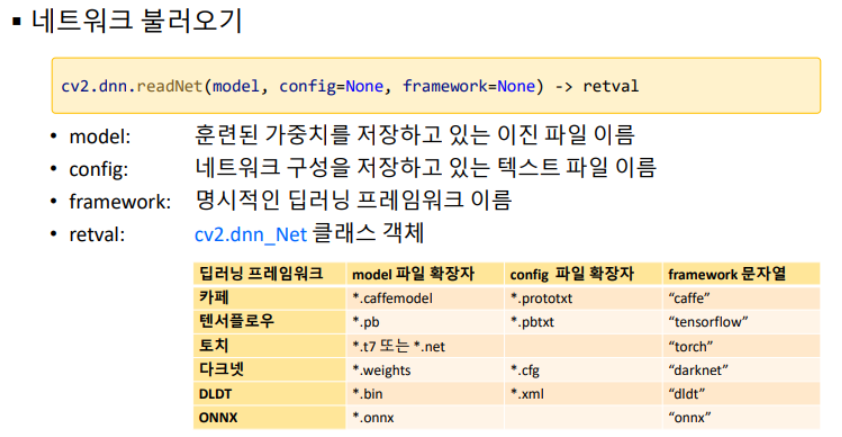
readNet 함수를 활용하여 모델 파일이름을 줍니다.
config는 네트워크가 어떻게 선언되어있는지 테스트 파일로 기술돼있는 것입니다.  
cv2.dnn_Net 클래스 객체를 가져옵니다. 만약 GoogleNet이라면 GoogleNet전체의 네트워크 망이 형성됩니다.

In [5]:
net = cv2.dnn.readNet('mnist_cnn.pb')

if net.empty():
    print('Network load failed!')
    sys.exit()

In [6]:
img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

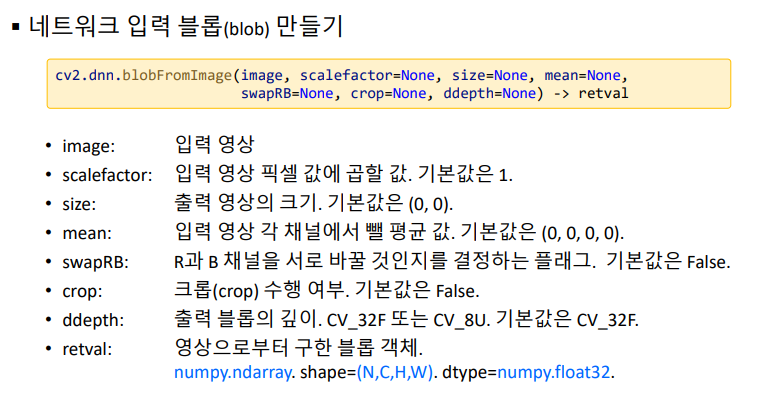  

4차원 형태의 행렬입니다.  
- N 사진개수  
- C Channel, 컬러의 경우 3
- H Height 
- W Width

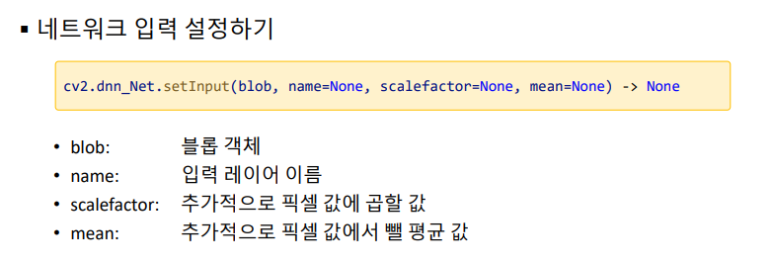
블럽을 네트워크 객체(Net)에 입력으로 주는 함수입니다.

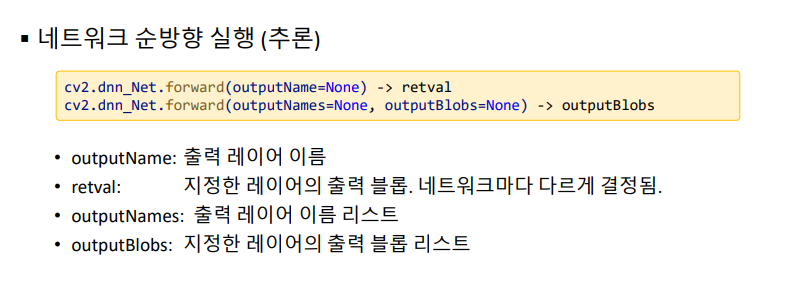  
setinput을 식행시키기 위해 forward 함수를 실행해 줍니다.

In [ ]:
while True:
    c = cv2.waitKey()

    if c == 27:
        break
    elif c == ord(' '):
        blob = cv2.dnn.blobFromImage(norm_digit(img), 1/255., (28, 28))
        net.setInput(blob)
        prob = net.forward()

        _, maxVal, _, maxLoc = cv2.minMaxLoc(prob)
        digit = maxLoc[0]

        print(f'{digit} ({maxVal * 100:4.2f}%)')

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


1 (100.00%)
2 (100.00%)
3 (100.00%)
7 (100.00%)
5 (100.00%)
6 (61.57%)
7 (100.00%)
8 (100.00%)
9 (100.00%)
1 (99.99%)
2 (98.87%)
3 (99.41%)
4 (100.00%)
5 (100.00%)
5 (100.00%)
7 (99.99%)
8 (100.00%)
9 (100.00%)
